In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
# Path to your JSON file
json_file_path = r'C:\Users\james\Documents\GitHub\top-coder-challenge\public_cases.json'

# Read the JSON file into a pandas DataFrame
df = pd.read_json(json_file_path)

# Flatten the 'input' column which contains dictionaries
df_flattened = pd.json_normalize(df['input'])

# Concatenate the flattened DataFrame with the 'expected_output' column
# This creates the final DataFrame with all keys from 'input' as new columns.
public_cases = pd.concat([df_flattened, df['expected_output']], axis=1)

In [5]:
public_cases

,trip_duration_days,miles_traveled,total_receipts_amount,expected_output
0,3,93.0,1.42,364.51
1,1,55.0,3.60,126.06
2,1,47.0,17.97,128.91
3,2,13.0,4.67,203.52
4,3,88.0,5.78,380.37
...,...,...,...,...
995,1,1082.0,1809.49,446.94
996,11,636.0,2238.97,1699.94
997,6,370.0,315.09,946.39
998,8,413.0,222.83,802.95


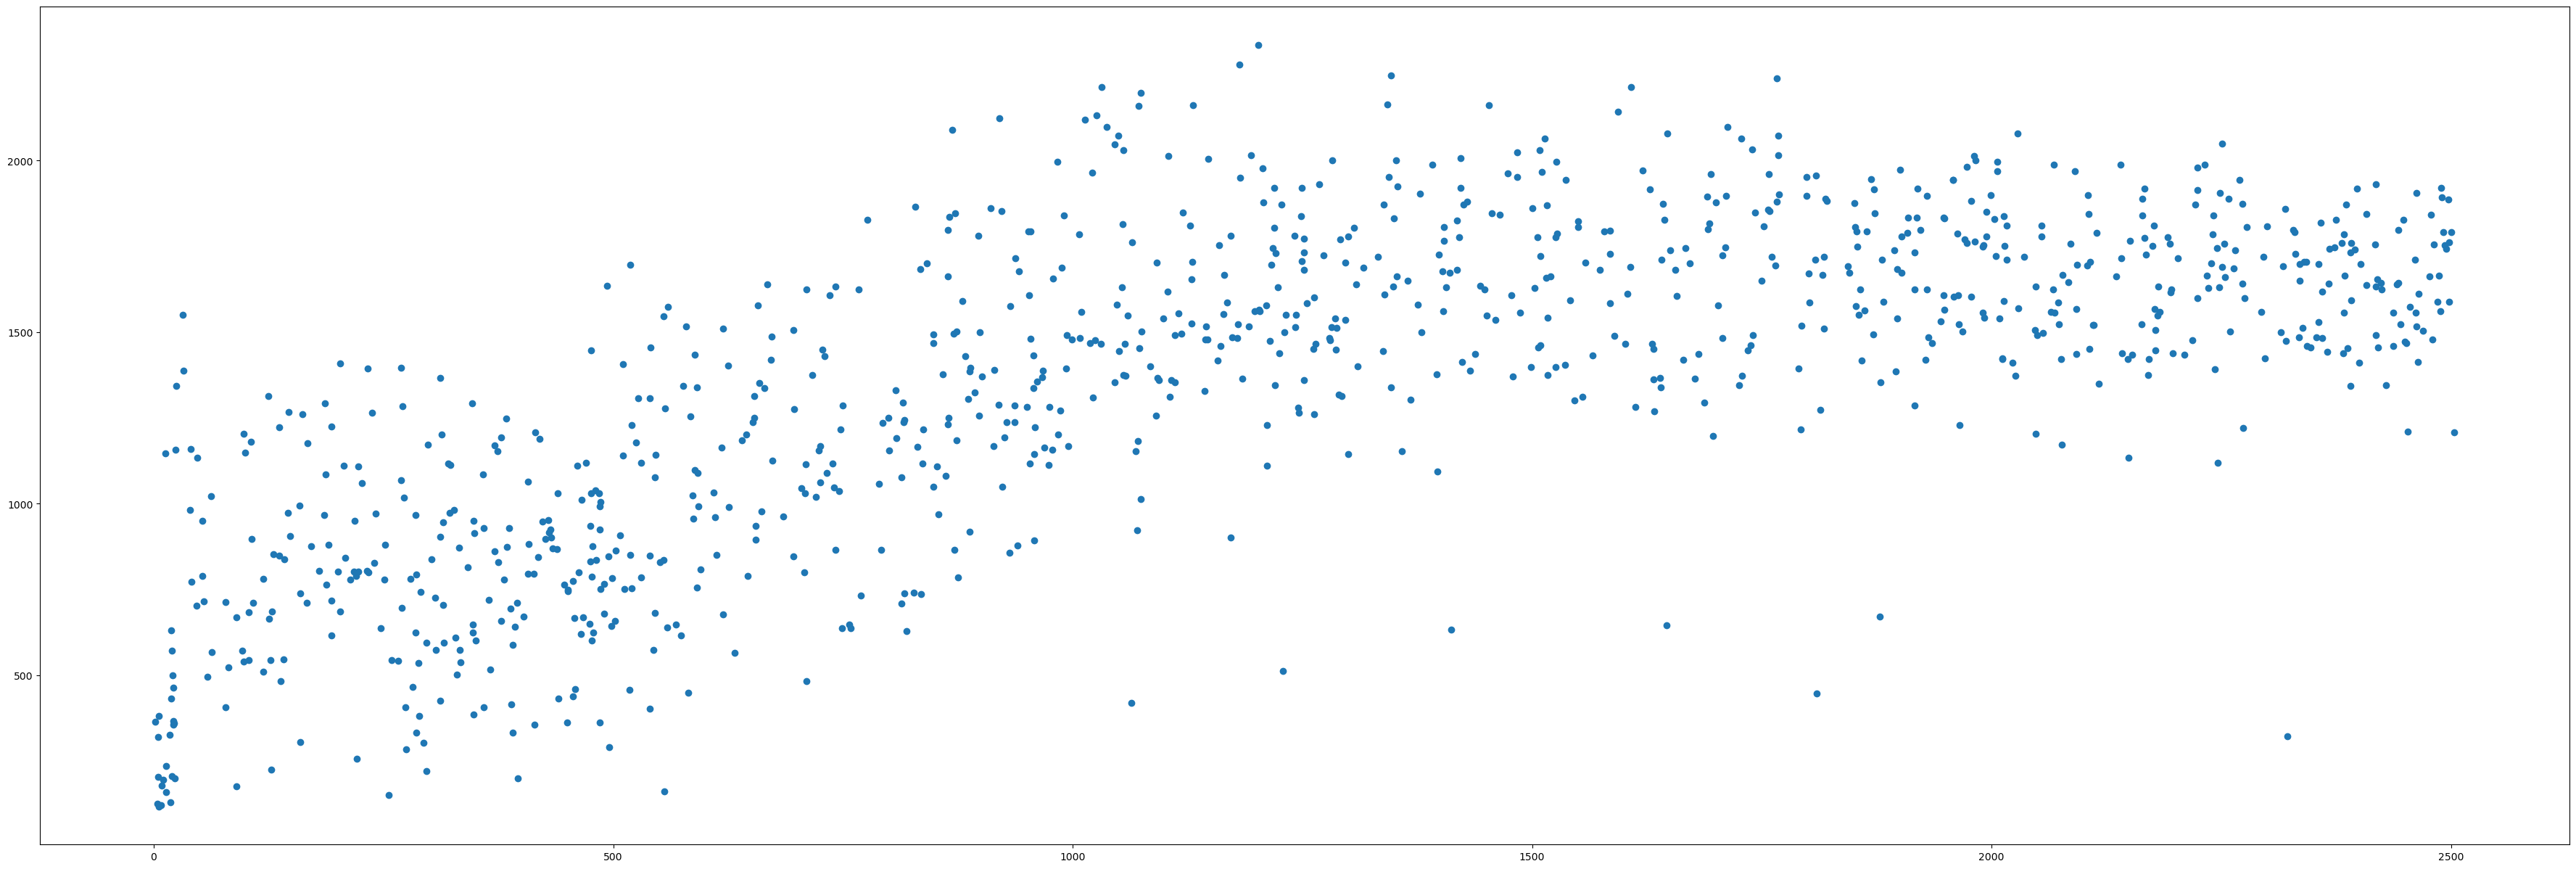

In [10]:
plt.figure(figsize=(45,15))
plt.scatter(public_cases['total_receipts_amount'],public_cases['expected_output'])
plt.show()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming you have the 'public_cases.json' file in the same directory as your script
df = pd.read_json(r'C:\Users\james\Documents\GitHub\top-coder-challenge\public_cases.json', orient='records')

# Flatten the 'input' column which contains dictionaries
df_flattened_inputs = pd.json_normalize(df['input'])

# Concatenate the flattened DataFrame with the 'expected_output' column
df_final = pd.concat([df_flattened_inputs, df['expected_output']], axis=1)

# --- Step 2: Define Features (X) and Target (y) ---
X = df_final[['trip_duration_days', 'miles_traveled', 'total_receipts_amount']]
y = df_final['expected_output']

# --- Step 3: Split Data into Training and Testing Sets ---
# We use a 80/20 split for training and testing data. random_state ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Standardize Features ---
# Scaling features is crucial for neural networks to perform well.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 5: Build the Neural Network Model ---
model = Sequential([
    # Input layer and first hidden layer: 64 neurons, ReLU activation.
    # input_shape matches the number of features (3 in this case).
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    
    # Second hidden layer: 32 neurons, ReLU activation.
    Dense(32, activation='relu'),
    
    # Output layer: 1 neuron for regression (predicting a single continuous value).
    # No activation function for the output layer in regression problems, or linear activation.
    Dense(1) 
])

# --- Step 6: Compile the Model ---
# Optimizer: Adam is a popular choice. learning_rate controls the step size during optimization.
# Loss function: 'mse' (Mean Squared Error) is standard for regression tasks.
# Metrics: 'mae' (Mean Absolute Error) is added to monitor during training.
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# --- Step 7: Train the Model ---
# epochs: Number of times the model will iterate over the entire training dataset.
# batch_size: Number of samples per gradient update.
# validation_split: Reserves a portion of the training data for validation during training.
# verbose: Set to 0 to suppress training output per epoch.
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# --- Step 8: Evaluate the Model ---
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Mean Squared Error (MSE): {loss:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae:.2f}")

# Display the model's architecture
model.summary()

# --- Optional: Make predictions ---
# To make a prediction for a new input, ensure it's scaled the same way.
# Example: Predict for a trip of 2 days, 100 miles, and 10.50 total receipts
new_input = pd.DataFrame([[2, 100, 10.50]], columns=['trip_duration_days', 'miles_traveled', 'total_receipts_amount'])
new_input_scaled = scaler.transform(new_input)
predicted_output = model.predict(new_input_scaled)[0][0]
print(f"\nPredicted output for the new input: {predicted_output:.2f}")

c:\Users\james\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Mean Squared Error (MSE): 46420.89
Test Mean Absolute Error (MAE): 170.28


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,109 (27.77 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,740 (18.52 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step

Predicted output for the new input: 465.46


c:\Users\james\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


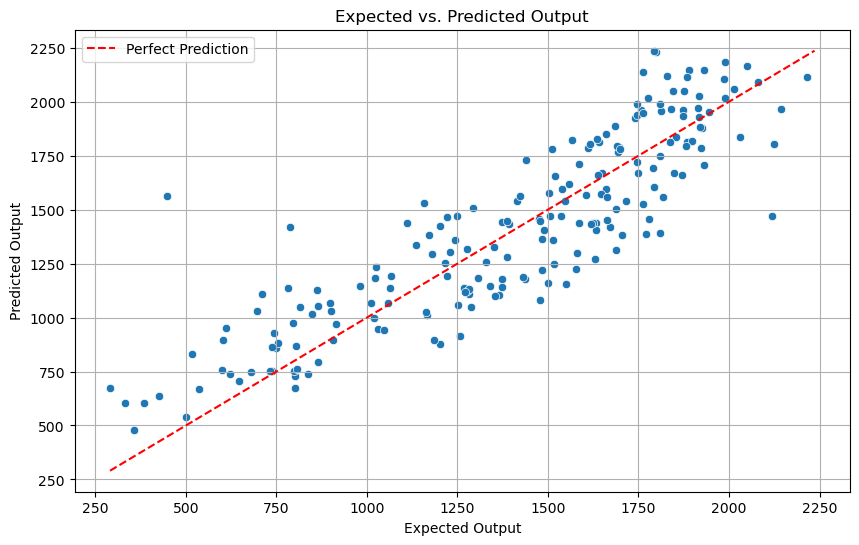

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# It is crucial to clear the TensorFlow session if running in an interactive environment
# where the kernel state persists to avoid 'AlreadyExistsError'.
tf.keras.backend.clear_session()

# --- Re-create the DataFrame and split data as they were in the training step ---
# This ensures consistency for making predictions on the same test set.
# Assuming 'public_cases.json' is available in the current directory.
df = pd.read_json(r'C:\Users\james\Documents\GitHub\top-coder-challenge\public_cases.json', orient='records')
df_flattened_inputs = pd.json_normalize(df['input'])
df_final = pd.concat([df_flattened_inputs, df['expected_output']], axis=1)

X = df_final[['trip_duration_days', 'miles_traveled', 'total_receipts_amount']]
y = df_final['expected_output']

# Split the data into training and testing sets with the same random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using the same scaler fitted on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Re-build and re-train the model ---
# This part is included here to ensure y_pred can be generated in a single script run.
# In a fresh environment, this should run without the 'AlreadyExistsError'.
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model (verbose=0 to suppress extensive output during training)
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# --- Make predictions on the test set ---
y_pred = model.predict(X_test_scaled)

# --- Plotting Expected vs. Predicted Output ---
plt.figure(figsize=(10, 6))
# Use .flatten() as y_pred is typically a 2D array (e.g., (n_samples, 1))
sns.scatterplot(x=y_test, y=y_pred.flatten())

# Add a diagonal line representing perfect predictions (where Expected = Predicted)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Expected vs. Predicted Output')
plt.xlabel('Expected Output')
plt.ylabel('Predicted Output')
plt.grid(True)
plt.legend()
plt.show()